In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd
import openpyxl


### 데이터 크롤링 

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument("disable-gpu")
options.add_argument(
    "user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36")  # 네트워크 설정
options.add_argument("lang=ko_KR")
driver = webdriver.Chrome("/Users/park/Desktop/Assignment/IT집중교육/project/chromedriver")

data_list = []
max_iter = 20
url_list = []
title_list = []
# url = "https://www.youtube.com/c/UPKTV/videos"
# url = "https://www.youtube.com/"
url = 'https://www.youtube.com/c/MBCNEWS11/videos'
url1 = 'https://www.youtube.com/sbs8news/videos'
url2 = 'https://www.youtube.com/c/newskbs/videos'


In [ ]:
def scroll_down(url_str):
    driver.get(url_str)
    last_page_height = driver.execute_script(
        "return document.documentElement.scrollHeight")
    i = 0
    while i < max_iter:
        driver.execute_script(
            "window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(3)
        i += 1
        new_page_height = driver.execute_script(
            "return document.documentElement.scrollHeight")
        if new_page_height == last_page_height:
            break


In [ ]:
def find_url(url_str):
		scroll_down(url_str)
		html0 = driver.page_source
		html = BeautifulSoup(html0, 'html.parser')
		video_url_list = html.findAll('a', {'id': 'video-title'})
		# video_url_list = html.findAll('a', {'id': 'video-title-link'})
		for a in video_url_list:
				title_list.append(a.text)
				# if a.get('href') is not None:
				# 		url_list.append('https://www.youtube.com' + a.get('href'))
find_url(url)
find_url(url1)
find_url(url2)


In [ ]:
rst = pd.DataFrame(title_list, columns=['title'])
rst.to_excel(f'/Users/park/Desktop/Assignment/IT집중교육/project/title_data_random_3.xlsx', index=False)


In [ ]:
def main():
    find_url()
    print("Total Length = " + " ", len(url_list))
    for idx in range(len(url_list)):
        print("iter = ", idx + 1)
        driver.get(url_list[idx])
        last_page_height = driver.execute_script(
            "return document.documentElement.scrollHeight")
        i = 0
        while i < max_iter:
            driver.execute_script(
                "window.scrollTo(0, document.documentElement.scrollHeight);")
            time.sleep(2)
            i += 1
            new_page_height = driver.execute_script(
                "return document.documentElement.scrollHeight")
            if new_page_height == last_page_height:
                break

        html0 = driver.page_source
        html = BeautifulSoup(html0, 'html.parser')
        comments_list = html.findAll(
            'ytd-comment-thread-renderer', {'class': 'style-scope ytd-item-section-renderer'})

        for j in range(len(comments_list)):
            comment = comments_list[j].find(
                'yt-formatted-string', {'id': 'content-text'}).text
            comment = comment.replace('\n', '')  # 줄 바뀜 없애기
            comment = comment.replace('\t', '')  # 탭 줄이기

            data = {'comment': comment}
            data_list.append(data)

        result_df = pd.DataFrame(data_list, columns=['comment'])
        result_df.to_excel(
            f'/Users/park/Desktop/Assignment/IT집중교육/project/comment_news_data_random.xlsx', index=False)
    driver.close()


In [ ]:
main()

### 데이터 전처리

In [178]:
import re
import pandas as pd

k = 0
# df = pd.read_excel('comment_data.xlsx')
df = pd.read_excel('comment_news_data_random.xlsx')
title_df = pd.read_excel('title_data_random_3.xlsx')
data = df['comment']
title_data = title_df['title']

In [179]:
data

0       검사를 상대할수 있는건 특검 밖에 없다.  경찰의 수사권은 경찰이 뵹신이라 지키지 ...
1       정말로 검찰도 견제해야할 기관이 필요하다 그리고 잘못내린결정에. 끝까지 책임추궁할 ...
2       대통령이  사과를 안하면 국힘이라도 좀 겸손히 사과할 것은 사과를 해야지 어찌그리 ...
3       민주당안에서 대장동 발언했던 사람이 누구인가?내각제를 생각하는 정치인들은 누구인가?...
4       윤씨권력예산높이고  국민예산  낯추는것은  윤씨권력의  철권통치권력의  기반이된다 ...
5       지금까지 출현한적 없는 새로운 권력집단과대한민국의 미래가 정면 충돌하는 양상이 펼쳐...
6           법무부(검찰청)예산 전액 삭감해라 &윤통 국회 시정연설 전부 보이콧 해라!!!!!
7                      국힘 수준이 윤 김건희 따라가네~~  휴~  제발 특검하길~~
8                       대장동특검가자ㆍ궁금합니다ㆍ왜 수용안하는지 그것이 이상합니다ㆍ
9                                   이번에 기득권 검찰 언론 다 잡아야한다
10                                             야당 좋은사람 많아
11                                               윤석열 탄핵해라
12      보복정치 정치탄합이라는거 국민들도 다아는사실인데 정작 당에 있는놈이 모를리 없건만 ...
13             윤서결은국민에뜻을절대로꺽지못할것이다.이제부터우리국민은검찰독제와맞서싸욹것이다.
14                                               MBC 힘내요!
15                                              국회을멀라고온다고
16                                              처음보는 의원인데
17            

In [180]:
title_data

0        [뜨거운 세계] 1회 "직업이 주석" 3연임 절대반지 낀 시진핑 (2022.10.23)
1       민주 "특검 수용하라, 대통령 시정 연설 묵과 못해" - [LIVE] MBC 뉴스데...
2       [날씨] '북서쪽 찬공기 영향' 내일 출근길 파주 2도·서울 6도 (2022.10....
3       [스포츠 영상] 울산 현대, 17년 걸린 우승 세리머니 (2022.10.23/뉴스데...
4       '뒤집기 득점왕' 조규성‥'첫 승강 PO행' 안양 (2022.10.23/뉴스데스크/...
5       SPC 계열사 공장서 또 안전사고‥작업 도중 '손가락 절단' (2022.10.23/...
6       [현장36.5] 걱정마세요! 제가 듣잖아요‥'청각장애인 도우미견' (2022.10....
7       "제2의 블랙핑크 꿈꿔요"‥태국 아이돌의 한국 유학기 (2022.10.23/뉴스데스...
8       공공기관 난방 17도 - 대통령실, 국회, 법원은 예외 (2022.10.23/뉴스데...
9           시진핑계가 '싹쓸이'‥장기집권 문 열었다 (2022.10.23/뉴스데스크/MBC)
10      [단독] 김순호 '대공분실' 명단 입수‥"너도 전향하면 특채" (2022.10.23...
11      안성 붕괴사고 사망자 3명으로‥시공사 "진심으로 죄송" (2022.10.23/뉴스데...
12      '레고랜드발' 시장 혼란에‥정부 "50조 유동성 공급" (2022.10.23/뉴스데...
13      국민의힘 "특검 수용 불가"‥'시정연설 거부'는 "정부여당에 대한 겁박" (2022...
14      민주 "특검 수용하라, 대통령 시정 연설 묵과 못해" (2022.10.23/뉴스데스...
15      이재명 '최측근' 구속 관련 더불어민주당 박홍근 원내대표 기자회견 - [끝까지LIV...
16      국민의힘 주호영 원내대표 기자간담회 - [끝까지LIVE] MBC뉴스 2022년 10...
17        어린이집

In [181]:
# 한글자로 되어있는 단어 & 모음 (ㅋㅋㅋ, ㅎㅎㅎ, 와, 는, 꼭, 가, 더, 은 등등) 및 한글이 아닌 단어들(이모티콘, 숫자, 영어)은 정규표현식을 이용해 제거
new_data = []
new_title_data = []
for i in data:
		text = re.compile('[가-힣]+').findall(str(i))
		tmp = []
		if len(text) <= 1:
			pass
		for tok in text:
			if len(tok) <= 1:
				continue
			tmp.append(tok)
		new_data.append(' '.join(tmp))

for i in title_data:
	text = re.compile('[가-힣]+').findall(str(i))
	tmp = []
	if len(text) <= 1:
			pass
	for tok in text:
		if len(tok) <= 1:
			continue
		tmp.append(tok)
	new_title_data.append(' '.join(tmp))


In [182]:
# 비어있는 row 제거
print(len(new_data))
drop_index = []
for i in range(len(new_data)):
	if new_data[i] == '':
		drop_index.append(i)
new_data = pd.DataFrame(new_data)
new_data = new_data.drop(drop_index)
print(len(new_data))

print(len(new_title_data))
drop_index = []
for i in range(len(new_title_data)):
	if new_title_data[i] == '':
		drop_index.append(i)
new_title_data = pd.DataFrame(new_title_data)
new_title_data = new_title_data.drop(drop_index)
print(len(new_title_data))


7496
7459
1740
1740


In [183]:
new_data


0
0     검사를 상대할수 있는건 특검 밖에 없다 경찰의 수사권은 경찰이 뵹신이라 지키지 못하...
1     정말로 검찰도 견제해야할 기관이 필요하다 그리고 잘못내린결정에 끝까지 책임추궁할 법...
2     대통령이 사과를 안하면 국힘이라도 겸손히 사과할 것은 사과를 해야지 어찌그리 대통령...
3     민주당안에서 대장동 발언했던 사람이 누구인가 내각제를 생각하는 정치인들은 누구인가 ...
4     윤씨권력예산높이고 국민예산 낯추는것은 윤씨권력의 철권통치권력의 기반이된다 윤씨권력예...
5     지금까지 출현한적 없는 새로운 권력집단과대한민국의 미래가 정면 충돌하는 양상이 펼쳐...
6               법무부 검찰청 예산 전액 삭감해라 윤통 국회 시정연설 전부 보이콧 해라
7                               국힘 수준이 김건희 따라가네 제발 특검하길
8                        대장동특검가자 궁금합니다 수용안하는지 그것이 이상합니다
9                                   이번에 기득권 검찰 언론 잡아야한다
10                                           야당 좋은사람 많아
11                                             윤석열 탄핵해라
12    보복정치 정치탄합이라는거 국민들도 다아는사실인데 정작 당에 있는놈이 모를리 없건만 ...
13            윤서결은국민에뜻을절대로꺽지못할것이다 이제부터우리국민은검찰독제와맞서싸욹것이다
14                                                  힘내요
15                                            국회을멀라고온다고
16                                            처음보는 의원인데
17                                               몸통 가즈아
18                             특검을 하시거든 윤석열도 똑같이받아야 합니다
19                           야당 협치 해야 하고야당 탄압 중단 해야 합니다
20                               어케든 진흙탕 싸움으로 끌고가보려고 쯔쯪
22                                     법사위 넘겨주고무슨 쇼를 하냐
24                                     법사위 넘기는 무책임한 박홍근
25                    여기 죄표찍었나 댓글부대 알바들 일해서 벌어라 들떨어진것들아
26    박홍근 의원님 두손들고 원내대표되라고 밤중에도 기도했는데 법사위를 내주었어요 실망했...
27                윤석렬은 퇴진해라 당신은 정치할 깜이 못된다 그만두고 편하게 사세요
28                                       댓글부대들 배정 받았나보네
29                     민주당아 탁상공론 이제그만 행동하지 않으면 국민들 손절한다
30                                               굿바이이재명
32     잘했다 민주당 입법 행정 권력 잡았을때 갈지자로 걷더니 잘했다 줘도 못먹는 더불어민주당
33                                             당해버린 죄명씨
34                                   촛불 사이비 대결 천사 마귀 대결
35                                         야당 이재명당 많은잘못
36                                            이재명을 구속해라
37                               이재명 최측근은 체포하지 말란법이 있는가
38                            너도작작해라 찢재명편에서 영원할껏같냐 한심하긴
39                                          양천이타 대책없는늠들
40               여기도 덜떨어진 인간들이 이네 전정권에서도 진행한 수사 전부 특검하자
41                                             낮짝뚜꺼운 인간
42                                안땐굴둑에 연기나겠나이재명은 거짓말쟁이
43         홍근아 너도 형수 쌍욕을 들었겠지 쪽팔리지도 않냐 나라가 시끄럽다 구속 학수고대
44                                            이재명도 구속하라
45                                              발버둥치고있네
46    아무리 정치에 미쳐도 그렇지 단군이래 최대의 범죄를 저지른 자를 두둔하는 범죄 비호...
47    민주당 장점 선을 선이라 하고 악을 악이라 한다 민주당 단점 선을 선이라 하고 선을...
48                             경쟁만 하시지마시고 검찰수사 한번지커봐주심이
49                  더불어 민주당 민생 돈찍어 전국 뿌려라 대한민국 망하는 꼴좀보자
50    지역화폐 상품권 민생 위하면 전국 박홍근 뿌려라 추운 날씨 주으러 가자 여의도 민주...
51    박홍근 의원님 두손들고 원내대표되라고 밤중에도 기도했는데 법사위를 내주었어요 실망했...
52    전체 대사중 특히 원나잇이라고 한다 대실하러 갈래 찌찌 부분 예림이 대사칠 절실함이 보임
53    주호영 따위가 나불 마불 거리다니국민들이 원하고 있는데 특검은 안되는데대한민국은 국...
54                        특검이 아니면 추악하게 변절 왜곡되어 가는 막을 없다
55                   특검을 거부하는 그가 범인이다 알긋냐 호영아 대구 의원 나으리
56                             고발사주당과 검찰의 수사 조작 천벌 받습니다
57    주호영아 찢어져 있으면 입이냐 그러면 공정과 형평을 노래하는 썩열이 말대로 쥴리는 ...
58    특검수용하라고 뭐가 찔려서수용안하냐구요 통제를 하면뭐해 지시가문제지 그니까 건휘도 ...
59                                          특검 안받는 범인이다
60    특검을 거부하면 국민들은 정권 퇴진운동에 적극 동참하는 방향으로 진행될 밖에 국민들...
61                                정치인 검사인원 제한법 만들어라 지겹다
62                                                 특검해라
63                                        특검반대하는자가 범인이다
64    그러니니까 그냥 특검하세요 특검은 뒤로 미루시나 특검하면 다른말없겠지 특검을 않하려...
65                                     국민들이원하는특검을왜피하는거지
66                                     됐다그래라 국짐당도 압색가보자
67         주호영 특검을 거부하는 자가 범인이다 당신이 말이야 인간아 인간 완전 철면피구만
68             당명부터 바꿔라 국민 웃긴다 니들한태 힘준거 없다 떳떳하게 대장동특검해라
69                                      근데 특검을 하면 안되는거지
70                                          김건희특검 대장동특검
71                                                특검 찬성
72              한직 으로 보냈던건 굥씹쌔의 장모대응 문건 이나 만들고 있었기 때문이다
73                          그니까 너네 국짐당사 압수수색 나오면 받아드리냐고
74                 민주당

In [184]:
new_title_data

0
0                             뜨거운 세계 직업이 주석 연임 절대반지 시진핑
1               민주 특검 수용하라 대통령 시정 연설 묵과 못해 뉴스데스크 뜨거운 세계
2                      날씨 북서쪽 찬공기 영향 내일 출근길 파주 서울 뉴스데스크
3                         스포츠 영상 울산 현대 걸린 우승 세리머니 뉴스데스크
4                               뒤집기 득점왕 조규성 승강 안양 뉴스데스크
5                       계열사 공장서 안전사고 작업 도중 손가락 절단 뉴스데스크
6                     현장 걱정마세요 제가 듣잖아요 청각장애인 도우미견 뉴스데스크
7                         블랙핑크 꿈꿔요 태국 아이돌의 한국 유학기 뉴스데스크
8                          공공기관 난방 대통령실 국회 법원은 예외 뉴스데스크
9                              시진핑계가 싹쓸이 장기집권 열었다 뉴스데스크
10                   단독 김순호 대공분실 명단 입수 너도 전향하면 특채 뉴스데스크
11                    안성 붕괴사고 사망자 명으로 시공사 진심으로 죄송 뉴스데스크
12                         레고랜드발 시장 혼란에 정부 유동성 공급 뉴스데스크
13              국민의힘 특검 수용 불가 시정연설 거부 정부여당에 대한 겁박 뉴스데스크
14                     민주 특검 수용하라 대통령 시정 연설 묵과 못해 뉴스데스크
15          이재명 최측근 구속 관련 더불어민주당 박홍근 원내대표 기자회견 끝까지 중계방송
16                           국민의힘 주호영 원내대표 기자간담회 끝까지 뉴스
17                     어린이집 가기 싫다는 아이 설마 하고 확인했더니 뉴스 뉴스
18                      어깨가 차를 치더라고요 개월 아기 차에 태우고 뉴스 뉴스
19                      살에 왔어요 살이 알아요 선감도 끌려온 아이들 뉴스 뉴스
20                      정찰에서 폭격까지 현실화된 드론 전쟁 한국군은 뉴스 뉴스
21                이재명 최측근 구속 관련 더불어민주당 대응 기자회견 끝까지 중계방송
22                자막뉴스 늘어진 아이를 순간 아들이 떠올라 어떻게든 살려야겠다 뉴스
23                 엄마가 그러는데 양육비 주겠니 아빠가 주니까 그런 거지 뉴스 뉴스
24                        날씨 상강 서늘한 바람 한낮 서울 대기질 나아져 뉴스
25                            파워볼 베낀 불법 게임장 운영 일당 검거 뉴스
26                           김순호 대공분실 구속자 명이 민주화 유공자 뉴스
27                                    집값 하락에 전세가율 넘어 뉴스
28                                    안성 추락사고 사망자 늘어 뉴스
29                          민주당 대통령 일까지 특검 수용 여부 답하라 뉴스
30                         오늘 비상 거시경제금융회의 자금시장 경색 논의 뉴스
31                         오늘 비상 거시경제금융회의 자금시장 경색 논의 뉴스
32        코인 주식 부동산 투자는 위험해 예금 채권 능력만큼 재테크 시대가 온다 뉴스 뉴스
33                     자막뉴스 송이 도둑 잡혔는데 경찰 이게 우리 일인가요 뉴스
34                      자막뉴스 월급도 받고 야반도주 언젠가는 이럴 알았죠 뉴스
35           자막뉴스 홀린 듯이 갔어요 위급한 순간 차에서 내린 여성이 전력 질주를 뉴스
36                     자막뉴스 출근 첫날부터 무슨 짓이냐 잡힌 그의 손기술 뉴스
37                      장소 불문 수억씩 싹둑 서울 집값 전방위 하락 뉴스 뉴스
38                    후쿠시마 오염수로 키운 광어 상태 보니 먹을 있나 뉴스 뉴스
39                         날씨 전국 대체로 흐려 영동 경북 동해안 뉴스투데이
40                          고개 숙인 가맹점주들 내부 감시 하겠다 뉴스투데이
41                         비상 거시경제금융회의 단기 자금시장 점검 뉴스투데이
42                            조작 정권 진실 드러나 엇갈린 여야 뉴스투데이
43                          검찰 수사 속도전 유동규 진술에 급물살 뉴스투데이
44                             검찰 수사 속도전 유동규 진술에 급물살 뉴스
45                전격 체포 만에 구속수감 검찰 캠프 대선자금 분명 풀영상 뉴스데스크
46                       이슈 전격 체포 만에 구속수감 검찰 캠프 대선자금 분명
47                     단독 정부 국방장관 구속 서훈 서주석 공범 적시 뉴스데스크
48                       날씨 상강 서늘한 바람 동해안 비구름 몰려와 뉴스데스크
49                          스포츠 영상 결승 진출 이끈 전력 질주 뉴스데스크
50                              리그 잔류 서울 사상 승강 수원 뉴스데스크
51                                마법 잠재운 키움 만에 격돌 뉴스데스크
52                       이탈리아 사상 여성 극우 총리 무솔리니 이후 뉴스데스크
53                            미리보는 경제 반응없는 재건축 시장 뉴스데스크
54                                  시진핑 연임 사실상 확정 뉴스데스크
55                                영상 단풍에 취한 가을 주말 뉴스데스크
56                           매출 하락 현실화 내부 감시자 되겠다 뉴스데스크
57                        단독 안성 노동자 높이 추락 규정 지켜졌다 뉴스데스크
58                    전격 체포 만에 구속수감 검찰 캠프 대선자금 분명 뉴스데스크
59                  서울 도심 보수 진보 나란히 맞불집회 시각 집회 상황 뉴스데스크
60                       검찰의 조작 수사 끝내야 의혹의 진실 드러나 뉴스데스크
61                          회유 당했다 유동규 작심 진술 파괴력은 뉴스데스크
62                    전격 체포 만에 구속수감 검찰 캠프 대선자금 분명 뉴스데스크
63               전부 올라 총리 지지율 빼고 좀비 총리 비난에 최단명 퇴진 뉴스 뉴스
64                    배가 군함이 아니라고요 탱크도 싣는데 전방위 수사 뉴스 뉴스
65                        작년 일본서도 정어리 떼죽음 그런데 이유가 뉴스 뉴스
66                     고가도로에서 화장실까지 지금 중국에서 무슨 일이 뉴스 뉴스
67                          기간제라 공무직이라 다친 것도 억울한데 뉴스 뉴스
68                              북한말 한마디 평야지대 북한말은 통일전망대
69                               부산 박람회장에 펼쳐진 통일의 통일전망대
70                         겨울에도 사자고추 먹어요 북한식 스마트팜 통일전망대
71                    

In [185]:
# from konlpy.tag import Kkma
# kkma = Kkma()

# def get_noun(row):
# 	nouns = kkma.nouns(row)
# 	return nouns


# new_data[0] = new_data[0].apply(lambda x: get_noun(x))

#kkma 보다 okt가 훨씬 빠름
from konlpy.tag import Okt
okt = Okt()

trash_nouns = ['뉴스', '뉴스데스크', '뉴스투데이']

def get_noun(row):
	nouns = okt.nouns(row)
	for n in trash_nouns:
		try:
			nouns.remove(n)
		except:
			pass
	return nouns

new_data[0] = new_data[0].apply(lambda x: get_noun(x))
new_title_data[0] = new_title_data[0].apply(lambda x: get_noun(x))


In [186]:
new_data[0]

0       [검사, 상대, 특검, 경찰, 수사권, 경찰, 뵹신, 못, 수사권, 가지, 수사, ...
1                     [검찰, 견제, 기관, 결정, 끝, 책임, 추궁, 법안, 생각]
2       [대통령, 사과, 국힘, 사과, 것, 사과, 어찌, 대통령, 대통령, 아예, 사람인...
3       [민주당, 안, 대장동, 발언, 사람, 누구, 내각제, 생각, 정치인, 누구, 국짐...
4       [윤씨, 권력, 예산, 높이, 국민, 예산, 낯, 윤씨, 권력, 철권, 통치권, 기...
5       [지금, 출현, 한적, 권력, 집단, 대한민국, 미래, 정면, 충돌, 양상, 이제,...
6       [법무부, 검찰청, 예산, 전액, 삭감, 윤통, 국회, 시정, 연설, 전부, 보이콧...
7                                   [국힘, 수준, 김건희, 제발, 특검]
8                                       [대장동, 특검, 수용, 그것]
9                                       [이번, 기득권, 검찰, 언론]
10                                               [야당, 사람]
11                                              [윤석열, 탄핵]
12      [보복, 정치, 정치, 합, 거, 국민, 사실, 정작, 당, 놈, 헛소리, 놈, 충...
13      [윤서, 결, 국민, 뜻, 절대로, 꺽지, 못, 이제, 우리, 국민, 검찰, 독제,...
14                                                     []
15                                                [국회, 을]
16                                               [처음, 의원]
17            

In [187]:
new_title_data[0]

0                              [세계, 직업, 주석, 임, 절대반지, 시진핑]
1                        [민주, 특검, 수용, 대통령, 시정, 연설, 묵, 세계]
2                   [날씨, 북서쪽, 찬, 공기, 영향, 내일, 출근길, 파주, 서울]
3                             [스포츠, 영상, 울산, 현대, 우승, 세리머니]
4                                         [득점, 규, 승강, 안양]
5                    [계, 열사, 공장, 안전, 사고, 작업, 도중, 손가락, 절단]
6                               [현장, 걱정, 제, 청각장애, 도우미, 견]
7                            [블랙, 핑크, 태국, 아이돌, 한국, 유학, 기]
8                            [공공기관, 난방, 대통령실, 국회, 법원, 예외]
9                                        [시진핑, 싹, 장기, 집권]
10                     [단독, 김순호, 대공분실, 명단, 입수, 너, 전향, 특채]
11                      [안성, 붕괴, 사고, 사망자, 명, 시공사, 진심, 죄송]
12                         [레고랜드, 발, 시장, 혼란, 정부, 유동성, 공급]
13        [국민, 힘, 특검, 수용, 불가, 시정, 연설, 거부, 정부, 여당, 대한, 겁박]
14                           [민주, 특검, 수용, 대통령, 시정, 연설, 묵]
15      [이재명, 최측근, 구속, 관련, 민주당, 박홍근, 원내대표, 기자회견, 끝, 중계방송]
16                           [국민, 힘, 주호영, 원내대표, 기자간담회, 끝]
17            

In [188]:
last_data = []
for text in new_data[0]:
	tmp = []
	for tok in text:
		if len(tok) <= 1:
			continue
		tmp.append(tok)
	last_data.append(' '.join(tmp))

last_title_data = []
for text in new_title_data[0]:
	tmp = []
	for tok in text:
		if len(tok) <= 1:
			continue
		tmp.append(tok)
	last_title_data.append(' '.join(tmp))


In [189]:
# print(last_data)
# 비어있는 row 제거
print(len(last_data))
drop_index = []
for i in range(len(last_data)):
	if last_data[i] == '':
		drop_index.append(i)
last_data = pd.DataFrame(last_data)
last_data = last_data.drop(drop_index)
print(len(last_data))

last_data[0] = last_data[0].apply(lambda x: get_noun(x))

print(len(last_title_data))
drop_index = []
for i in range(len(last_title_data)):
	if last_title_data[i] == '':
		drop_index.append(i)
last_title_data = pd.DataFrame(last_title_data)
last_title_data = last_title_data.drop(drop_index)
print(len(last_title_data))

last_title_data[0] = last_title_data[0].apply(lambda x: get_noun(x))


7459
7295
1740
1740


In [190]:
last_data[0]
last_title_data[0]

0                                 [세계, 직업, 주석, 절대반지, 시진핑]
1                           [민주, 특검, 수용, 대통령, 시정, 연설, 세계]
2                      [날씨, 북서쪽, 공기, 영향, 내일, 출근길, 파주, 서울]
3                             [스포츠, 영상, 울산, 현대, 우승, 세리머니]
4                                            [득점, 승강, 안양]
5                       [열사, 공장, 안전, 사고, 작업, 도중, 손가락, 절단]
6                                     [현장, 걱정, 청각장애, 도우미]
7                               [블랙, 핑크, 태국, 아이돌, 한국, 유학]
8                            [공공기관, 난방, 대통령실, 국회, 법원, 예외]
9                                           [시진핑, 장기, 집권]
10                        [단독, 김순호, 대공분실, 명단, 입수, 전향, 특채]
11                         [안성, 붕괴, 사고, 사망자, 시공사, 진심, 죄송]
12                            [레고랜드, 시장, 혼란, 정부, 유동성, 공급]
13           [국민, 특검, 수용, 불가, 시정, 연설, 거부, 정부, 여당, 대한, 겁박]
14                              [민주, 특검, 수용, 대통령, 시정, 연설]
15         [이재명, 최측근, 구속, 관련, 민주당, 박홍근, 원내대표, 기자회견, 중계방송]
16                                 [국민, 주호영, 원내대표, 기자간담회]
17            

/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_9667/2304875747.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_9667/2304875747.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_9667/2304875747.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_9667/2304875747.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var

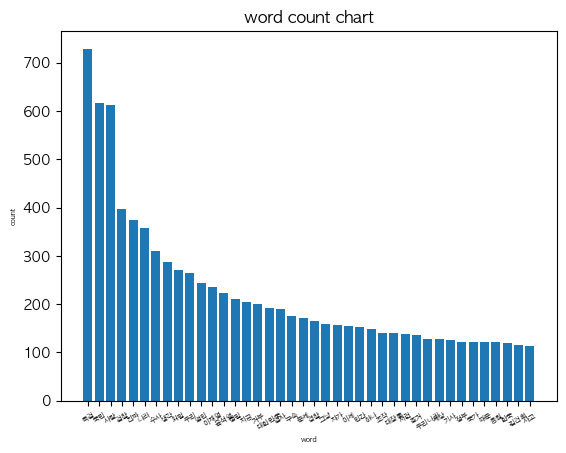

{'특검': 729, '국민': 616, '사람': 613, '검찰': 396, '진짜': 374, '나라': 357, '수사': 310, '생각': 288, '처벌': 270, '우리': 265, '범인': 244, '이재명': 236, '윤석열': 223, '정말': 211, '지금': 205, '거부': 201, '대한민국': 191, '검사': 190, '구속': 176, '문제': 172, '경찰': 164, '그냥': 159, '자가': 156, '이제': 155, '인간': 152, '하나': 149, '조작': 141, '대장동': 140, '저런': 138, '증거': 136, '우리나라': 128, '세상': 127, '기사': 126, '정부': 122, '국가': 121, '때문': 121, '응원': 121, '한국': 120, '김건희': 116, '사고': 114}


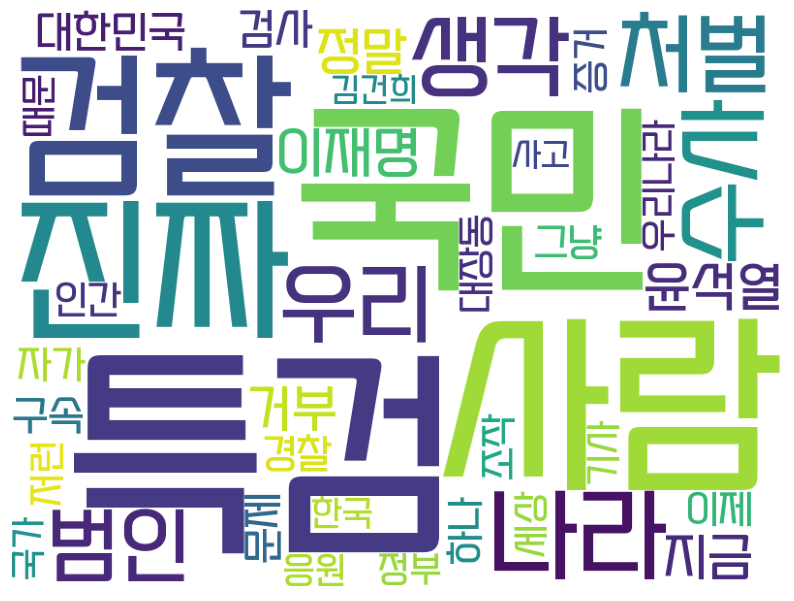

In [191]:
import numpy as np
import matplotlib.pylab as plt
from wordcloud import WordCloud
from collections import Counter


noun_list = []
for i in range(len(last_data)):
    for j in range(len(last_data[0].iloc[i])):
        noun_list.append(last_data[0].iloc[i][j])

counts = Counter(noun_list)
tags = counts.most_common(40)

#bar chart
test = pd.DataFrame({'word': [],
                    'count': []})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]

    insert_data = pd.DataFrame({'word': [word],
                                'count': [count]})
    test = test.append(insert_data)

test.index = range(len(test))

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

index = np.arange(len(test))
plt.bar(index, test['count'].tolist())
plt.xlabel('word', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt.title('word count chart')
plt.show()

wc = WordCloud(font_path='/Users/park/Desktop/Assignment/IT집중교육/project/SEBANG Gothic.ttf',
               background_color='white', width=800, height=600)
print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()


/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_9667/2354053667.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_9667/2354053667.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_9667/2354053667.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_9667/2354053667.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var

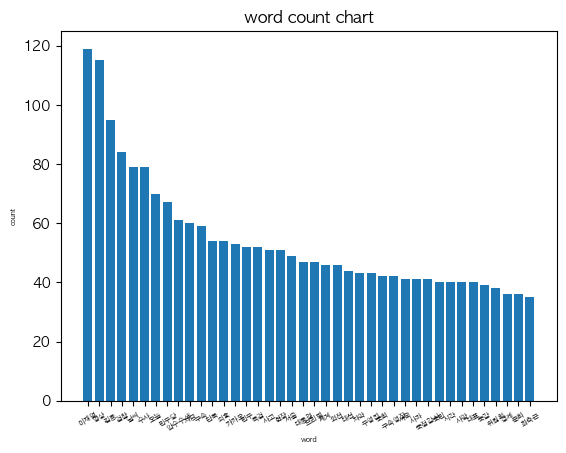

{'이재명': 119, '영상': 115, '김용': 95, '검찰': 84, '날씨': 79, '수사': 79, '오늘': 70, '민주당': 67, '압수수색': 61, '자금': 60, '구속': 59, '단독': 54, '의혹': 54, '카카오': 53, '민주': 52, '특검': 52, '사고': 51, '현장': 51, '서울': 49, '대통령': 47, '브리핑': 47, '세계': 46, '외전': 46, '대선': 44, '자막': 43, '주영진': 43, '국회': 42, '구속영장': 42, '서욱': 41, '사과': 41, '국정감사': 41, '국민': 40, '시각': 40, '사망': 40, '대표': 40, '국감': 39, '위원회': 38, '경제': 36, '문화': 36, '최측근': 35}


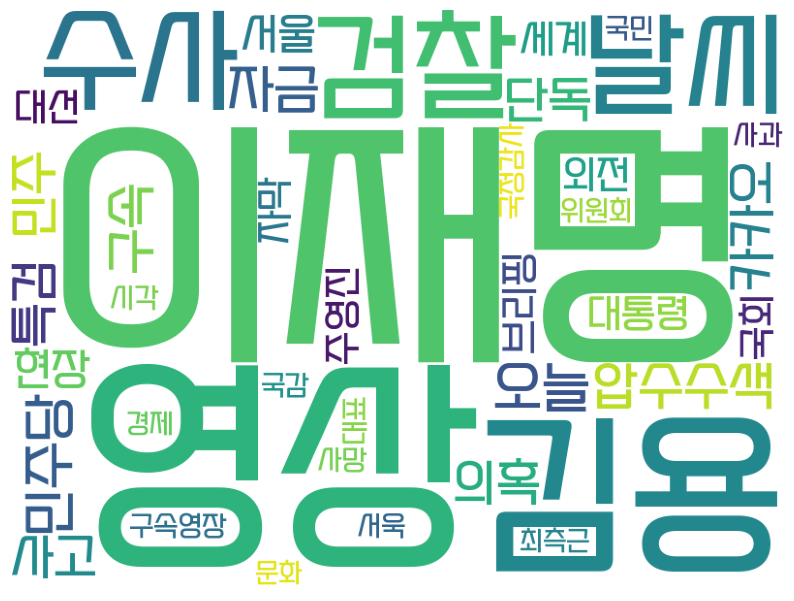

In [192]:
import numpy as np
import matplotlib.pylab as plt
from wordcloud import WordCloud
from collections import Counter


noun_list = []
for i in range(len(last_title_data)):
    for j in range(len(last_title_data[0].iloc[i])):
        noun_list.append(last_title_data[0].iloc[i][j])

counts = Counter(noun_list)
tags_t = counts.most_common(40)

#bar chart
test = pd.DataFrame({'word': [],
                    'count': []})
for i in range(len(tags_t)):
    word = tags_t[i][0]
    count = tags_t[i][1]

    insert_data = pd.DataFrame({'word': [word],
                                'count': [count]})
    test = test.append(insert_data)

test.index = range(len(test))

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

index = np.arange(len(test))
plt.bar(index, test['count'].tolist())
plt.xlabel('word', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt.title('word count chart')
plt.show()

wc = WordCloud(font_path='/Users/park/Desktop/Assignment/IT집중교육/project/SEBANG Gothic.ttf',
               background_color='white', width=800, height=600)
print(dict(tags_t))
cloud = wc.generate_from_frequencies(dict(tags_t))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()


In [193]:
vec = []
for i in range(len(new_data[0])):
    vec2 = []
    tm_ls = new_data[0].iloc[i]
    if len(tm_ls) == 0:  # 비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)):  # 비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

vec_title = []
for i in range(len(new_title_data[0])):
    vec2 = []
    tm_ls = new_title_data[0].iloc[i]
    if len(tm_ls) == 0:  # 비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)):  # 비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec_title.append(vec2)


In [194]:
print(len(vec))
print(len(vec_title))


7295
1740


In [195]:
# 단어 벡터화
from gensim.models import Word2Vec
model = Word2Vec(sentences=vec, vector_size=100,
								window=7, min_count=3, workers=4, sg=1)
model_title = Word2Vec(sentences=vec_title, vector_size=100, window=3, min_count=3, workers=4, sg=1)

In [196]:
print(last_data.shape)
print(last_title_data.shape)

print(model.wv.vectors.shape)
print(model_title.wv.vectors.shape)

# test_word = '영화'
# try:
# 	result = model.wv.most_similar(test_word, topn=10)
# 	for rst in result:
# 		print(rst)
# except:
# 	print("\'"+ test_word + "\'"+" 는 word2vec에 포함되지 않은 단어 입니다")


(7295, 1)
(1740, 1)
(2856, 100)
(1033, 100)


In [197]:
model.wv.vectors


array([[ 0.02709496,  0.3711582 ,  0.4413812 , ..., -0.2313639 ,
        -0.05536597,  0.00935473],
       [ 0.08812591,  0.33457837,  0.23097476, ..., -0.23948947,
        -0.13812675, -0.1038928 ],
       [ 0.15307532,  0.20374836, -0.126312  , ..., -0.0705106 ,
         0.13999651, -0.22911371],
       ...,
       [ 0.06100423,  0.11699835, -0.01839719, ..., -0.05210734,
         0.03640582, -0.08024448],
       [ 0.0762733 ,  0.12143589, -0.03090973, ..., -0.05485557,
         0.03367764, -0.08975442],
       [ 0.01850578,  0.02838097, -0.00364866, ..., -0.02120714,
         0.00642044, -0.03483039]], dtype=float32)

In [198]:
model_title.wv.key_to_index


{'이재명': 0,
 '영상': 1,
 '김용': 2,
 '검찰': 3,
 '수사': 4,
 '날씨': 5,
 '뉴스': 6,
 '오늘': 7,
 '민주당': 8,
 '압수수색': 9,
 '자금': 10,
 '구속': 11,
 '의혹': 12,
 '단독': 13,
 '카카오': 14,
 '특검': 15,
 '민주': 16,
 '현장': 17,
 '사고': 18,
 '서울': 19,
 '대통령': 20,
 '브리핑': 21,
 '외전': 22,
 '세계': 23,
 '대선': 24,
 '자막': 25,
 '주영진': 26,
 '국회': 27,
 '구속영장': 28,
 '국정감사': 29,
 '서욱': 30,
 '사과': 31,
 '사망': 32,
 '국민': 33,
 '시각': 34,
 '대표': 35,
 '국감': 36,
 '위원회': 37,
 '문화': 38,
 '경제': 39,
 '불법': 40,
 '최측근': 41,
 '체포': 42,
 '김홍희': 43,
 '유동': 44,
 '조사': 45,
 '연예': 46,
 '서해': 47,
 '청구': 48,
 '프리': 49,
 '내일': 50,
 '데스크': 51,
 '북한': 52,
 '혐의': 53,
 '한국': 54,
 '와글와글': 55,
 '야당': 56,
 '중계방송': 57,
 '공장': 58,
 '피격': 59,
 '미국': 60,
 '당사': 61,
 '시진핑': 62,
 '대국민': 63,
 '금리': 64,
 '중국': 65,
 '대장동': 66,
 '탄압': 67,
 '장관': 68,
 '글로벌': 69,
 '우려': 70,
 '경찰': 71,
 '최고': 72,
 '시간': 73,
 '정부': 74,
 '안성': 75,
 '긴급': 76,
 '영국': 77,
 '추락': 78,
 '플러스': 79,
 '아파트': 80,
 '수용': 81,
 '이유': 82,
 '총리': 83,
 '논란': 84,
 '제안': 85,
 '수수': 86,
 '사격': 87,
 '합의': 88,
 '확진'

In [199]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(model.wv.vectors)
pcaDF = pd.DataFrame(data=pca_data,
										index=model.wv.key_to_index)
# print(pcaDF)

pca_t = PCA(n_components=100)
pca_data_t = pca_t.fit_transform(model_title.wv.vectors)
pcaDF_t = pd.DataFrame(data=pca_data_t, index=model_title.wv.key_to_index)



In [200]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)': pca.explained_variance_, '기여율': pca.explained_variance_ratio_})
result['누적기여율'] = result['기여율'].cumsum()
pd.set_option('display.max_rows', None)
result


설명가능한 분산 비율(고윳값)       기여율     누적기여율
0          0.077225  0.632080  0.632080
1          0.029947  0.245112  0.877192
2          0.003760  0.030779  0.907971
3          0.002314  0.018942  0.926913
4          0.001590  0.013016  0.939929
5          0.000907  0.007423  0.947352
6          0.000492  0.004024  0.951376
7          0.000421  0.003446  0.954821
8          0.000344  0.002813  0.957635
9          0.000309  0.002532  0.960167

In [201]:
result = pd.DataFrame(
    {'설명가능한 분산 비율(고윳값)': pca_t.explained_variance_, '기여율': pca_t.explained_variance_ratio_})
result['누적기여율'] = result['기여율'].cumsum()
pd.set_option('display.max_rows', None)
result


설명가능한 분산 비율(고윳값)       기여율     누적기여율
0           0.009254  0.720696  0.720696
1           0.000077  0.005996  0.726692
2           0.000061  0.004776  0.731468
3           0.000061  0.004718  0.736187
4           0.000059  0.004572  0.740759
5           0.000057  0.004416  0.745175
6           0.000056  0.004389  0.749564
7           0.000055  0.004308  0.753872
8           0.000055  0.004245  0.758117
9           0.000054  0.004224  0.762340
10          0.000053  0.004120  0.766461
11          0.000053  0.004101  0.770562
12          0.000051  0.003999  0.774561
13          0.000051  0.003952  0.778513
14          0.000050  0.003896  0.782408
15          0.000050  0.003865  0.786274
16          0.000049  0.003808  0.790081
17          0.000049  0.003784  0.793865
18          0.000048  0.003768  0.797633
19          0.000048  0.003724  0.801357
20          0.000047  0.003669  0.805026
21          0.000047  0.003635  0.808661
22          0.000046  0.003595  0.812256
23          0.000046  0.003574  0.815830
24          0.000045  0.003519  0.819350
25          0.000045  0.003495  0.822844
26          0.000044  0.003443  0.826287
27          0.000044  0.003422  0.829709
28          0.000044  0.003410  0.833120
29          0.000043  0.003353  0.836472
30          0.000042  0.003308  0.839780
31          0.000042  0.003268  0.843048
32          0.000042  0.003260  0.846308
33          0.000041  0.003204  0.849511
34          0.000041  0.003190  0.852701
35          0.000041  0.003175  0.855877
36          0.000040  0.003137  0.859014
37          0.000039  0.003058  0.862072
38          0.000039  0.003018  0.865090
39          0.000039  0.003011  0.868101
40          0.000038  0.002958  0.871059
41          0.000038  0.002937  0.873997
42          0.000037  0.002898  0.876894
43          0.000037  0.002878  0.879772
44          0.000037  0.002853  0.882625
45          0.000036  0.002824  0.885449
46          0.000036  0.002821  0.888269
47          0.000036  0.002790  0.891059
48          0.000036  0.002783  0.893843
49          0.000036  0.002772  0.896614
50          0.000035  0.002733  0.899347
51          0.000035  0.002709  0.902057
52          0.000034  0.002679  0.904735
53          0.000034  0.002653  0.907389
54          0.000033  0.002607  0.909995
55          0.000033  0.002587  0.912583
56          0.000033  0.002579  0.915161
57          0.000033  0.002537  0.917699
58          0.000032  0.002504  0.920203
59          0.000032  0.002458  0.922661
60          0.000031  0.002410  0.925070
61          0.000031  0.002393  0.927464
62          0.000031  0.002376  0.929840
63          0.000030  0.002368  0.932208
64          0.000030  0.002349  0.934556
65          0.000030  0.002307  0.936863
66          0.000029  0.002249  0.939112
67          0.000029  0.002242  0.941354
68          0.000028  0.002217  0.943571
69          0.000028  0.002213  0.945783
70          0.000028  0.002176  0.947959
71          0.000028  0.002152  0.950111
72          0.000028  0.002144  0.952255
73          0.000027  0.002094  0.954349
74          0.000027  0.002091  0.956440
75          0.000027  0.002064  0.958504
76          0.000026  0.002034  0.960538
77          0.000026  0.002008  0.962546
78          0.000026  0.001999  0.964545
79          0.000025  0.001965  0.966510
80          0.000025  0.001961  0.968471
81          0.000025  0.001919  0.970390
82          0.000024  0.001899  0.972289
83          0.000024  0.001851  0.974140
84          0.000023  0.001806  0.975945
85          0.000023  0.001791  0.977737
86          0.000023  0.001774  0.979511
87          0.000023  0.001767  0.981278
88          0.000022  0.001729  0.983008
89          0.000022  0.001717  0.984725
90          0.000022  0.001696  0.986421
91          0.000021  0.001653  0.988074
92          0.000021  0.001638  0.989712
93          0.000020  0.001563  0.991275
94          0.000020  0.001522  0.992797
95          0.000019  0.001495  0.994292
96          0.000019  0.001

In [202]:
pca = PCA(n_components=10)
pca_data = pca.fit_transform(model.wv.vectors)
pcaDF = pd.DataFrame(data=pca_data, index=model.wv.key_to_index)
# print(pca.explained_variance_ratio_)

pca_t = PCA(n_components=85)
pca_data_t = pca_t.fit_transform(model_title.wv.vectors)
pcaDF_t = pd.DataFrame(data=pca_data_t, index=model_title.wv.key_to_index)


In [203]:
# SVD
import numpy as np
U, s, Vt = np.linalg.svd(model.wv.vectors, full_matrices=True)

s_symmetric = np.zeros(model.wv.vectors.shape)
for i in range(len(s)):
    s_symmetric[i][i] = s[i]


U_t, s_t, Vt_t = np.linalg.svd(model_title.wv.vectors, full_matrices=True)

s_t_symmetric = np.zeros(model_title.wv.vectors.shape)
for i in range(len(s_t)):
    s_t_symmetric[i][i] = s_t[i]


In [204]:
print('origin matrix =', model.wv.vectors.shape)
print('------------------')
print('U matrix =', U.shape)
print('------------------')
print('s matrix =', s.shape)
print('------------------')
print('s_symmetric matrix =', s_symmetric.shape)
print('------------------')
print('Vt matrix =', Vt.shape)
print('------------------')
matA = np.dot(U, np.dot(s_symmetric, Vt))
print(model.wv.vectors - matA)
print('------------------')
print(s_symmetric)
# print('------------------')
# print(model.wv.key_to_index)


origin matrix = (2856, 100)
------------------
U matrix = (2856, 2856)
------------------
s matrix = (100,)
------------------
s_symmetric matrix = (2856, 100)
------------------
Vt matrix = (100, 100)
------------------
[[ 1.07435431e-08  1.97124058e-08 -1.57479280e-08 ... -3.45381446e-09
   9.93577880e-10 -1.24886608e-08]
 [-9.22830978e-11  1.45152597e-08  4.88252713e-09 ... -1.57821808e-09
  -3.93934307e-09  4.73284488e-09]
 [ 9.76643727e-09  1.99789276e-08 -5.08182965e-09 ... -3.44589424e-09
   7.62138339e-09 -7.58677413e-09]
 ...
 [ 6.37058996e-10  3.33231312e-09  2.28019725e-10 ... -3.07476267e-13
   7.60602380e-10  9.03762440e-10]
 [ 4.96498546e-09  1.12900805e-08 -1.08791856e-09 ... -3.05176037e-09
   2.23146513e-09 -4.39917165e-09]
 [-1.34871739e-10  1.59320733e-09  9.14927988e-10 ... -1.79571875e-10
   1.19276671e-10  2.18737251e-10]]
------------------
[[63.08581161  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          9.27764893  0.         ...  0.      

In [205]:
print('origin matrix =', model_title.wv.vectors.shape)
print('------------------')
print('U matrix =', U_t.shape)
print('------------------')
print('s matrix =', s_t.shape)
print('------------------')
print('s_symmetric matrix =', s_t_symmetric.shape)
print('------------------')
print('Vt matrix =', Vt_t.shape)
print('------------------')
matB = np.dot(U_t, np.dot(s_t_symmetric, Vt_t))
print(model_title.wv.vectors - matB)
print('------------------')
print(s_t_symmetric)
# print('------------------')
# print(model_title.wv.key_to_index)


origin matrix = (1033, 100)
------------------
U matrix = (1033, 1033)
------------------
s matrix = (100,)
------------------
s_symmetric matrix = (1033, 100)
------------------
Vt matrix = (100, 100)
------------------
[[-4.63934370e-10  1.00004289e-09 -1.72601940e-10 ...  2.75392181e-10
   6.95797898e-11  1.67616935e-09]
 [-8.99723004e-12  7.19159017e-10  9.37045944e-11 ...  4.88957916e-10
  -2.16648288e-11  1.03701223e-09]
 [ 4.86209864e-10 -1.13062073e-09 -6.89145754e-11 ...  2.61982391e-09
   1.54253924e-10  3.75954653e-09]
 ...
 [-3.41588550e-11  7.13569455e-11  1.87926957e-10 ...  1.57214589e-10
  -1.03682293e-10  2.39790318e-10]
 [ 2.63698959e-11 -4.20562118e-10 -1.95563462e-10 ...  4.47678821e-11
  -3.10003602e-11  1.35971257e-10]
 [ 1.64239417e-10 -4.54113178e-10 -1.86169519e-10 ... -7.36683829e-10
   3.71217280e-10  3.42897011e-10]]
------------------
[[4.61707497 0.         0.         ... 0.         0.         0.        ]
 [0.         0.28315246 0.         ... 0.         0

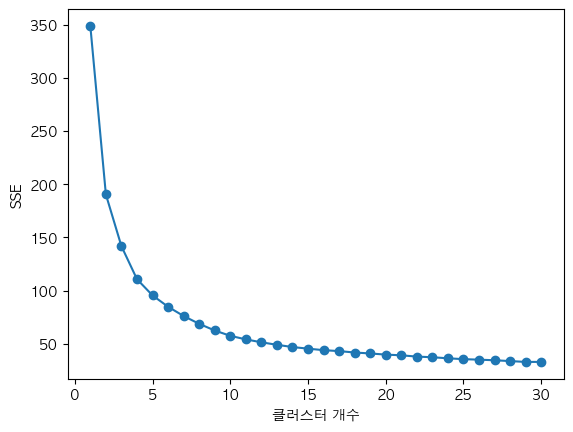

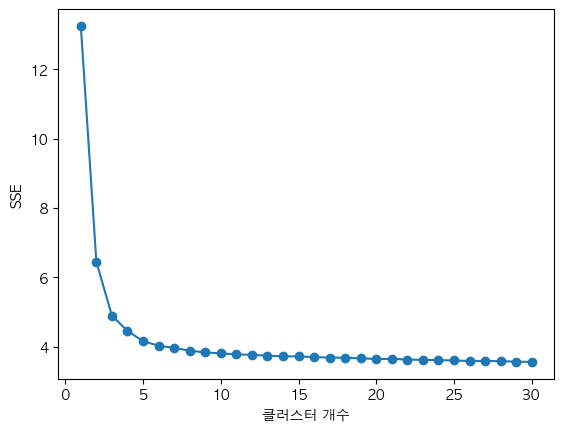

In [206]:
from sklearn.cluster import KMeans
max_cluster_num = 30
def find_elbow(X):
	sse = []
	for n in range(1, max_cluster_num + 1):
		km = KMeans(n_clusters=n, init='k-means++')
		km.fit(X)
		sse.append(km.inertia_)
	plt.plot(range(1, max_cluster_num + 1), sse, marker='o')
	plt.xlabel('클러스터 개수')
	plt.ylabel('SSE')
	plt.show()


# find_elbow(pcaDF)
find_elbow(model.wv.vectors)
# find_elbow(pcaDF_t)
find_elbow(model_title.wv.vectors)


In [207]:
from sklearn.cluster import KMeans

kmeans_clustering = KMeans(n_clusters=10, init='k-means++')
idx = kmeans_clustering.fit_predict(model.wv.vectors)

kmeans_clustering_title = KMeans(
    n_clusters=5, init='k-means++')
idx_t = kmeans_clustering.fit_predict(model_title.wv.vectors)


In [208]:
idx = list(idx)
names = model.wv.index_to_key
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
# print(word_centroid_map)

idx_t = list(idx_t)
names = model_title.wv.index_to_key
word_centroid_map_t = {names[i]: idx_t[i] for i in range(len(names))}
# # print(word_centroid_map)


In [209]:
cluster_data = []
for cluster in range(10):
		print("\nCluster {}".format(cluster))
		words = []
		for i in range(0, len(list(word_centroid_map.values()))):
				if (list(word_centroid_map.values())[i] == cluster):
						words.append(list(word_centroid_map.keys())[i])
		cluster_data.append(words)
		print(words)

cluster_data_t = []
for cluster in range(5):
	print("\nCluster {}".format(cluster))
	words = []
	for i in range(0, len(list(word_centroid_map_t.values()))):
		if (list(word_centroid_map_t.values())[i] == cluster):
			words.append(list(word_centroid_map_t.keys())[i])
	cluster_data_t.append(words)
	print(words)



Cluster 0
['트러스', '존나', '나머지', '군함', '보이스피싱', '라이', '혼란', '포상', '노고', '맙시', '지도자', '아무나', '김순호', '아주머니', '중단', '돼지', '좌우', '리가', '소름', '조선', '동바리', '개고기', '억지로', '와우', '간부', '도둑질', '지랄', '방사청', '수산물', '소설', '일해', '살이', '남한', '갈대', '깡통', '유로', '사하라', '문재인', '모조리', '폭발', '시나리오', '법인', '하나요', '군사독재', '완성', '살인죄', '거니', '물살', '원전', '일방', '실체', '정은아', '자연', '어쩌', '조국', '적발', '삼성', '폭망', '졸라', '어르신', '모금', '실행', '뒷돈', '입맛', '아줌마', '아이디어', '일삼', '깜빵', '공소', '보이지', '마산', '소비', '자동차', '고문', '먼지', '독재자', '을해', '타령', '천지', '식이', '외면', '편파', '팥빵', '두렁', '유출', '콜걸', '후쿠시마', '지능', '제때', '론스타', '불공정', '은마', '기레기', '파도', '여부', '죄인', '단독', '박홍근', '영아', '읍니', '야구', '대구', '아침', '몰수', '취하', '의인', '라지', '무솔리니', '생기지', '일반인', '간만', '분리', '방치', '부품', '애기', '납치', '본보기', '한편', '위원장', '분도', '녀석', '낱낱이', '기지', '마리', '주시', '오후', '벌이', '타인', '공포', '전략', '배상', '공약', '단죄', '박정희', '탈락', '티비', '징글징글', '토요일', '상대방', '전이', '징벌', '해지', '본적', '후속', '박탈', '최후', '야간', '직권남용', '매년', '천명', '수두', '후퇴', '이틀', '혐의', '지출', '연탄',

In [212]:
# 의미 있는 단어들
meaningful_data = []
for i in range(10):
	word_arr = []
	for word in cluster_data[i]:
		idx = model.wv.key_to_index[word]
		for data in s_symmetric[idx]:
			if data == 0:
				continue
			word_arr.append(model.wv.index_to_key[idx])
			meaningful_data.append(model.wv.index_to_key[idx])
	if len(word_arr) == 0:
		continue
	print("Cluster", i, "=>", word_arr)

print('\n')

meaningful_data_title = []
for i in range(5):
	word_arr = []
	for word in cluster_data_t[i]:
		idx = model_title.wv.key_to_index[word]
		for data in s_t_symmetric[idx]:
			if data == 0:
				continue
			word_arr.append(model_title.wv.index_to_key[idx])
			meaningful_data_title.append(model_title.wv.index_to_key[idx])
	if len(word_arr) == 0:
		continue
	print("Cluster", i, "=>", word_arr)


Cluster 1 => ['검찰', '대한민국', '검사', '구속', '조작', '증거', '응원', '모두', '판사', '유동', '정치', '누가', '정권', '사건', '위해', '시간', '진술', '누구', '반드시', '범죄', '회유', '사실', '진실']
Cluster 3 => ['국민', '수사', '이재명', '윤석열', '김건희', '민주당', '대통령', '국힘', '대선', '대표']
Cluster 5 => ['사람', '생각', '처벌', '정말', '문제', '경찰', '그냥', '저런', '우리나라', '세상', '기사', '국가', '때문', '한국', '사고', '얼마나', '영국', '정도', '일본', '기업', '드론', '노동자', '상황', '계속', '미국', '명복', '중국', '일이', '이번', '안전', '보고', '북한', '아이', '자신', '마음', '간호사', '다른', '공무원']
Cluster 6 => ['특검', '범인', '거부', '자가', '대장동']
Cluster 8 => ['진짜', '나라', '우리', '지금', '이제', '인간', '하나', '정부', '집회', '이상', '다시', '사과', '언론', '제발', '무슨', '언제', '자기', '시작', '제대로', '가족', '걱정', '모든']
Cluster 9 => ['가맹', '점주']


Cluster 1 => ['외전', '문화', '최측근', '데스크', '중계방송', '위반', '제빵', '결정', '미세먼지', '반발']
Cluster 2 => ['글로벌', '부산']
Cluster 4 => ['뉴스', '민주', '브리핑', '자막', '시각', '불법', '체포', '연예', '청구', '프리', '와글와글', '미국', '대장동', '탄압', '경찰', '영국', '플러스', '아파트', '수용', '논란', '수수', '사격', '합의', '확진', '노동자', '피해']


In [213]:
def find_meaningful_data(A, B):
	real_last_data = []
	for data in A:
		for data2 in B:
			if data2[0] == data:
				real_last_data.append(data)
	real_last_data_2 = []
	for data in A:
		flag_t = 1
		for data2 in B:
			if data2[0] == data:
				flag_t = 0
				break
		if flag_t == 1:
			real_last_data_2.append(data)
	real_last_data_3 = []
	for data in B:
		flag_t = 1
		for data2 in A:
			if data2 == data[0]:
				flag_t = 0
				break
		if flag_t == 1:
			real_last_data_3.append(data)
	print("빈도수가 높은 단어 : ", B)
	print("\nSVD 의미 있는 단어 : ", A)
	print("\n빈도수가 높은 단어 and SVD 의미 있는 단어 : ", real_last_data)
	print("\nSVD 의미 있는 단어 - 빈도수가 높은 단어(의미 있는 단어 but, 빈도수는 낮음) : ", real_last_data_2)
	print("\n빈도수가 높은 단어 - SVD 의미 있는 단어(빈도수는 높으나 의미 있는 단어가 아님) : ", real_last_data_3)

find_meaningful_data(meaningful_data, tags)
print("\n")
find_meaningful_data(meaningful_data_title, tags_t)

빈도수가 높은 단어 :  [('특검', 729), ('국민', 616), ('사람', 613), ('검찰', 396), ('진짜', 374), ('나라', 357), ('수사', 310), ('생각', 288), ('처벌', 270), ('우리', 265), ('범인', 244), ('이재명', 236), ('윤석열', 223), ('정말', 211), ('지금', 205), ('거부', 201), ('대한민국', 191), ('검사', 190), ('구속', 176), ('문제', 172), ('경찰', 164), ('그냥', 159), ('자가', 156), ('이제', 155), ('인간', 152), ('하나', 149), ('조작', 141), ('대장동', 140), ('저런', 138), ('증거', 136), ('우리나라', 128), ('세상', 127), ('기사', 126), ('정부', 122), ('국가', 121), ('때문', 121), ('응원', 121), ('한국', 120), ('김건희', 116), ('사고', 114)]

SVD 의미 있는 단어 :  ['검찰', '대한민국', '검사', '구속', '조작', '증거', '응원', '모두', '판사', '유동', '정치', '누가', '정권', '사건', '위해', '시간', '진술', '누구', '반드시', '범죄', '회유', '사실', '진실', '국민', '수사', '이재명', '윤석열', '김건희', '민주당', '대통령', '국힘', '대선', '대표', '사람', '생각', '처벌', '정말', '문제', '경찰', '그냥', '저런', '우리나라', '세상', '기사', '국가', '때문', '한국', '사고', '얼마나', '영국', '정도', '일본', '기업', '드론', '노동자', '상황', '계속', '미국', '명복', '중국', '일이', '이번', '안전', '보고', '북한', '아이', '자신', '마음', '간호사', '다른', '공무원',

빈도수가 높은 단어 :  [('특검', 729), ('국민', 616), ('사람', 613), ('검찰', 396), ('진짜', 374), ('나라', 357), ('수사', 310), ('생각', 288), ('처벌', 270), ('우리', 265), ('범인', 244), ('이재명', 236), ('윤석열', 223), ('정말', 211), ('지금', 205), ('거부', 201), ('대한민국', 191), ('검사', 190), ('구속', 176), ('문제', 172), ('경찰', 164), ('그냥', 159), ('자가', 156), ('이제', 155), ('인간', 152), ('하나', 149), ('조작', 141), ('대장동', 140), ('저런', 138), ('증거', 136), ('우리나라', 128), ('세상', 127), ('기사', 126), ('정부', 122), ('국가', 121), ('때문', 121), ('응원', 121), ('한국', 120), ('김건희', 116), ('사고', 114)]

SVD 의미 있는 단어 :  ['검찰', '대한민국', '검사', '구속', '조작', '증거', '응원', '모두', '판사', '유동', '정치', '누가', '정권', '사건', '위해', '시간', '진술', '누구', '반드시', '범죄', '회유', '사실', '진실', '국민', '수사', '이재명', '윤석열', '김건희', '민주당', '대통령', '국힘', '대선', '대표', '사람', '생각', '처벌', '정말', '문제', '경찰', '그냥', '저런', '우리나라', '세상', '기사', '국가', '때문', '한국', '사고', '얼마나', '영국', '정도', '일본', '기업', '드론', '노동자', '상황', '계속', '미국', '명복', '중국', '일이', '이번', '안전', '보고', '북한', '아이', '자신', '마음', '간호사', '다른', '공무원', '특검', '범인', '거부', '자가', '대장동', '진짜', '나라', '우리', '지금', '이제', '인간', '하나', '정부', '집회', '이상', '다시', '사과', '언론', '제발', '무슨', '언제', '자기', '시작', '제대로', '가족', '걱정', '모든', '가맹', '점주']

빈도수가 높은 단어 and SVD 의미 있는 단어 :  ['검찰', '대한민국', '검사', '구속', '조작', '증거', '응원', '국민', '수사', '이재명', '윤석열', '김건희', '사람', '생각', '처벌', '정말', '문제', '경찰', '그냥', '저런', '우리나라', '세상', '기사', '국가', '때문', '한국', '사고', '특검', '범인', '거부', '자가', '대장동', '진짜', '나라', '우리', '지금', '이제', '인간', '하나', '정부']

SVD 의미 있는 단어 - 빈도수가 높은 단어(의미 있는 단어 but, 빈도수는 낮음) :  ['모두', '판사', '유동', '정치', '누가', '정권', '사건', '위해', '시간', '진술', '누구', '반드시', '범죄', '회유', '사실', '진실', '민주당', '대통령', '국힘', '대선', '대표', '얼마나', '영국', '정도', '일본', '기업', '드론', '노동자', '상황', '계속', '미국', '명복', '중국', '일이', '이번', '안전', '보고', '북한', '아이', '자신', '마음', '간호사', '다른', '공무원', '집회', '이상', '다시', '사과', '언론', '제발', '무슨', '언제', '자기', '시작', '제대로', '가족', '걱정', '모든', '가맹', '점주']

빈도수가 높은 단어 - SVD 의미 있는 단어(빈도수는 높으나 의미 있는 단어가 아님) :  []


빈도수가 높은 단어 :  [('이재명', 119), ('영상', 115), ('김용', 95), ('검찰', 84), ('날씨', 79), ('수사', 79), ('오늘', 70), ('민주당', 67), ('압수수색', 61), ('자금', 60), ('구속', 59), ('단독', 54), ('의혹', 54), ('카카오', 53), ('민주', 52), ('특검', 52), ('사고', 51), ('현장', 51), ('서울', 49), ('대통령', 47), ('브리핑', 47), ('세계', 46), ('외전', 46), ('대선', 44), ('자막', 43), ('주영진', 43), ('국회', 42), ('구속영장', 42), ('서욱', 41), ('사과', 41), ('국정감사', 41), ('국민', 40), ('시각', 40), ('사망', 40), ('대표', 40), ('국감', 39), ('위원회', 38), ('경제', 36), ('문화', 36), ('최측근', 35)]

SVD 의미 있는 단어 :  ['외전', '문화', '최측근', '데스크', '중계방송', '위반', '제빵', '결정', '미세먼지', '반발', '글로벌', '부산', '뉴스', '민주', '브리핑', '자막', '시각', '불법', '체포', '연예', '청구', '프리', '와글와글', '미국', '대장동', '탄압', '경찰', '영국', '플러스', '아파트', '수용', '논란', '수수', '사격', '합의', '확진', '노동자', '피해']

빈도수가 높은 단어 and SVD 의미 있는 단어 :  ['외전', '문화', '최측근', '민주', '브리핑', '자막', '시각']

SVD 의미 있는 단어 - 빈도수가 높은 단어(의미 있는 단어 but, 빈도수는 낮음) :  ['데스크', '중계방송', '위반', '제빵', '결정', '미세먼지', '반발', '글로벌', '부산', '뉴스', '불법', '체포', '연예', '청구', '프리', '와글와글', '미국', '대장동', '탄압', '경찰', '영국', '플러스', '아파트', '수용', '논란', '수수', '사격', '합의', '확진', '노동자', '피해']

빈도수가 높은 단어 - SVD 의미 있는 단어(빈도수는 높으나 의미 있는 단어가 아님) :  [('이재명', 119), ('영상', 115), ('김용', 95), ('검찰', 84), ('날씨', 79), ('수사', 79), ('오늘', 70), ('민주당', 67), ('압수수색', 61), ('자금', 60), ('구속', 59), ('단독', 54), ('의혹', 54), ('카카오', 53), ('특검', 52), ('사고', 51), ('현장', 51), ('서울', 49), ('대통령', 47), ('세계', 46), ('대선', 44), ('주영진', 43), ('국회', 42), ('구속영장', 42), ('서욱', 41), ('사과', 41), ('국정감사', 41), ('국민', 40), ('사망', 40), ('대표', 40), ('국감', 39), ('위원회', 38), ('경제', 36)]